<a href="https://colab.research.google.com/github/ndtuan10/Image-Processing-And-Applications_CS406.M11.KHCL/blob/main/BaiTap/Binary_Image_Processing/BaiTap5%3A%20Binary%20Image%20Processing%20(Connected%20Component%20Labeling%2C%20Automatic%20number-plate%20recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ngô Đức Tuấn**

MSSV: 18520186

##**Bài tập 5: Xử lý ảnh nhị phân (Binary image processing) tiếp theo**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
path ='/content/drive/MyDrive/CS406.M11.KHCL/Baitap/Baitap5/images/'
path_2 ='/content/drive/MyDrive/CS406.M11.KHCL/Baitap/Baitap4/images/'

In [ ]:
path_img1 = os.path.join(path,'art8.jpg')
path_img2 = os.path.join(path,'Bansoxe03.jpg')
path_img3 = os.path.join(path_2,'rice.png')

In [ ]:
# Hiển thị ảnh kết quả
def show(img, new_img, title1, title2):
    plt.figure(figsize = (10, 10))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = plt.imshow(img, interpolation = 'bicubic')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    new_img = plt.imshow(new_img, interpolation = 'bicubic')

In [ ]:
img1 = cv2.imread(path_img1)
img2 = cv2.imread(path_img2)
img3 = cv2.imread(path_img3,0)

# **Yêu cầu 1: Xác định thành phần liên thông theo liên thông 4**

## `art8.jpg`

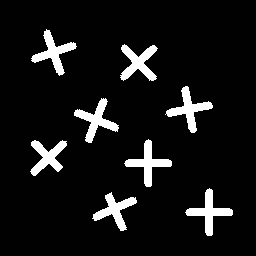

In [ ]:
cv2_imshow(img1)

In [ ]:
def threshold(img, T):
    new_img = img.copy()
    w, h = img.shape
    for i in range (w):
        for j in range (h):
                if (img[i][j]) > T:
                    new_img[i][j] = 255
                else:
                    new_img[i][j] = 0
    return new_img

In [ ]:
def connected_component_label(f):
    f = cv2.imread(path_img1, 0)
    f = cv2.threshold(f, 127, 255, cv2.THRESH_BINARY)[1]
    num_labels, labels = cv2.connectedComponents(f)

    label_hue = np.uint8(179*labels/np.max(labels))
    k = 255*np.ones_like(label_hue)

    labeled_f = cv2.merge([label_hue, k, k])
    labeled_f = cv2.cvtColor(labeled_f, cv2.COLOR_HSV2BGR)
    labeled_f[label_hue==0] = 0

    return labeled_f

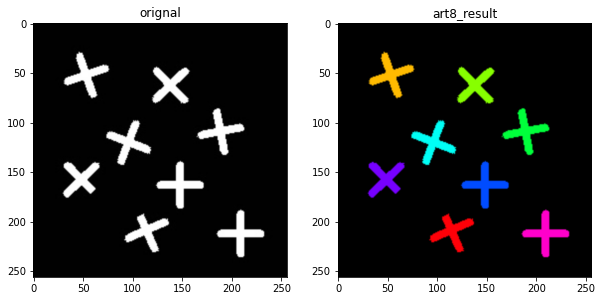

In [ ]:
show(img1, connected_component_label(img1), "orignal", "art8_result")

## `rice.png`

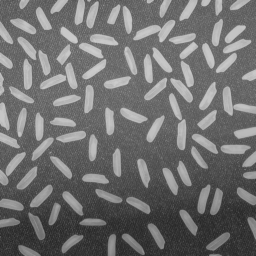

In [ ]:
cv2_imshow(img3)

In [ ]:
def opening(f, s):
    kernel = np.ones((s, s), np.uint8)
    new_image = cv2.morphologyEx(f, cv2.MORPH_OPEN, kernel)

    return new_image

def dilation(f, s):
    kernel = np.ones((s, s), np.uint8)
    new_image = cv2.dilate(f, kernel, cv2.BORDER_REFLECT)

    return new_image

def erosion(f, s):
    kernel = np.ones((s, s), np.uint8)
    new_image = cv2.erode(f, kernel, cv2.BORDER_REFLECT)

    return new_image

def connected_component_label_2(f):
    f = cv2.imread(path_img3, 0)
    f = cv2.threshold(f, 127, 255, cv2.THRESH_BINARY)[1]
    num_labels, labels = cv2.connectedComponents(f)

    label_hue = np.uint8(179*labels/np.max(labels))
    k = 255*np.ones_like(label_hue)

    labeled_f = cv2.merge([label_hue, k, k])
    labeled_f = cv2.cvtColor(labeled_f, cv2.COLOR_HSV2BGR)
    labeled_f[label_hue==0] = 0

    return labeled_f

In [ ]:
thresh = threshold(img3, 110)
rice = opening(thresh, 2)
rice = erosion(rice, 5)
rice = dilation(rice, 4)

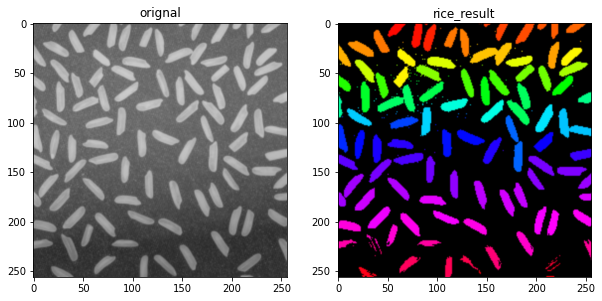

In [ ]:
show(img3, connected_component_label_2(rice), "orignal", "rice_result")

In [ ]:
def connected_component_label_with_Stats(f):
  gray = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
  connectivity=4
  thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  num_labels, labels, stats, centroid = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
	
  return num_labels, labels, stats, centroid

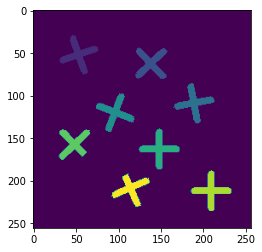

In [ ]:
plt.imshow(connected_component_label_with_Stats(img1)[1])

# **Yêu cầu 2: Biển số xe**

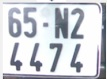

In [ ]:
cv2_imshow(img2)

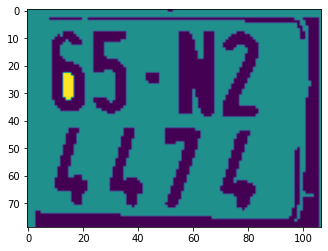

In [ ]:
plt.imshow(connected_component_label_with_Stats(img2)[1])

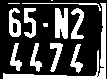

In [ ]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

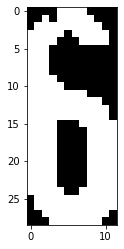

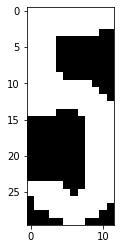

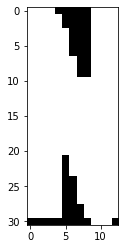

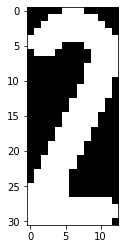

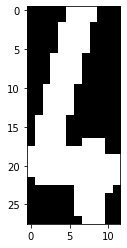

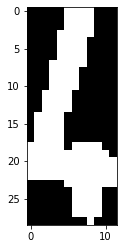

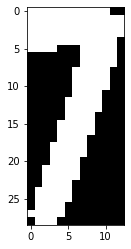

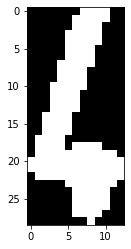

In [ ]:
connectivity=4
num_labels, labels, stats, centroid = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)

mask = np.zeros(img2.shape, dtype="uint8")
for i in range(0, num_labels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]    
    if  w < 15 and w > 5 and h > 5: 
        c = thresh[y:y + h,x:x+w]
        img_rst = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rst)
        plt.show()